# INTRODUCTION
<font color = "red">
Content:
    
1. [Data Understanding](#1)
1. [Data Preparation](#2)
1. [Model Building and Deployment](#3)
    * [Spliting Data Into Features & Targets](#4)
    * [Undersampling](#5)       
    * [Train-Test-Split](#6)  
    * [Methods](#7)
    * [High Accuracy Ranking(First 6)](#8)
    * [Highest TP and TN(First 6)](#9)
1. [Conclusion](#10)     


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


<a id= "1"></a>
# Data Understanding

In [2]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [8]:
df.shape

(284807, 31)

In [9]:
Time=df["Time"]
npTime= Time.to_numpy().reshape(-1,1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Scaled_Time = scaler.fit_transform(npTime)
Scaled_Time
N=["New_Time"]


In [11]:
df_Time = pd.DataFrame(data=Scaled_Time, columns = N)
print(df_Time)

        New_Time
0       0.000000
1       0.000000
2       0.000006
3       0.000006
4       0.000012
...          ...
284802  0.999965
284803  0.999971
284804  0.999977
284805  0.999977
284806  1.000000

[284807 rows x 1 columns]


In [12]:
df.drop(columns=["Time"],inplace=True)


In [13]:
train= pd.concat([df,df_Time],axis=1)
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,New_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000006
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000006
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000012


<a id= "2"></a>
# Data Preparation

<AxesSubplot:>

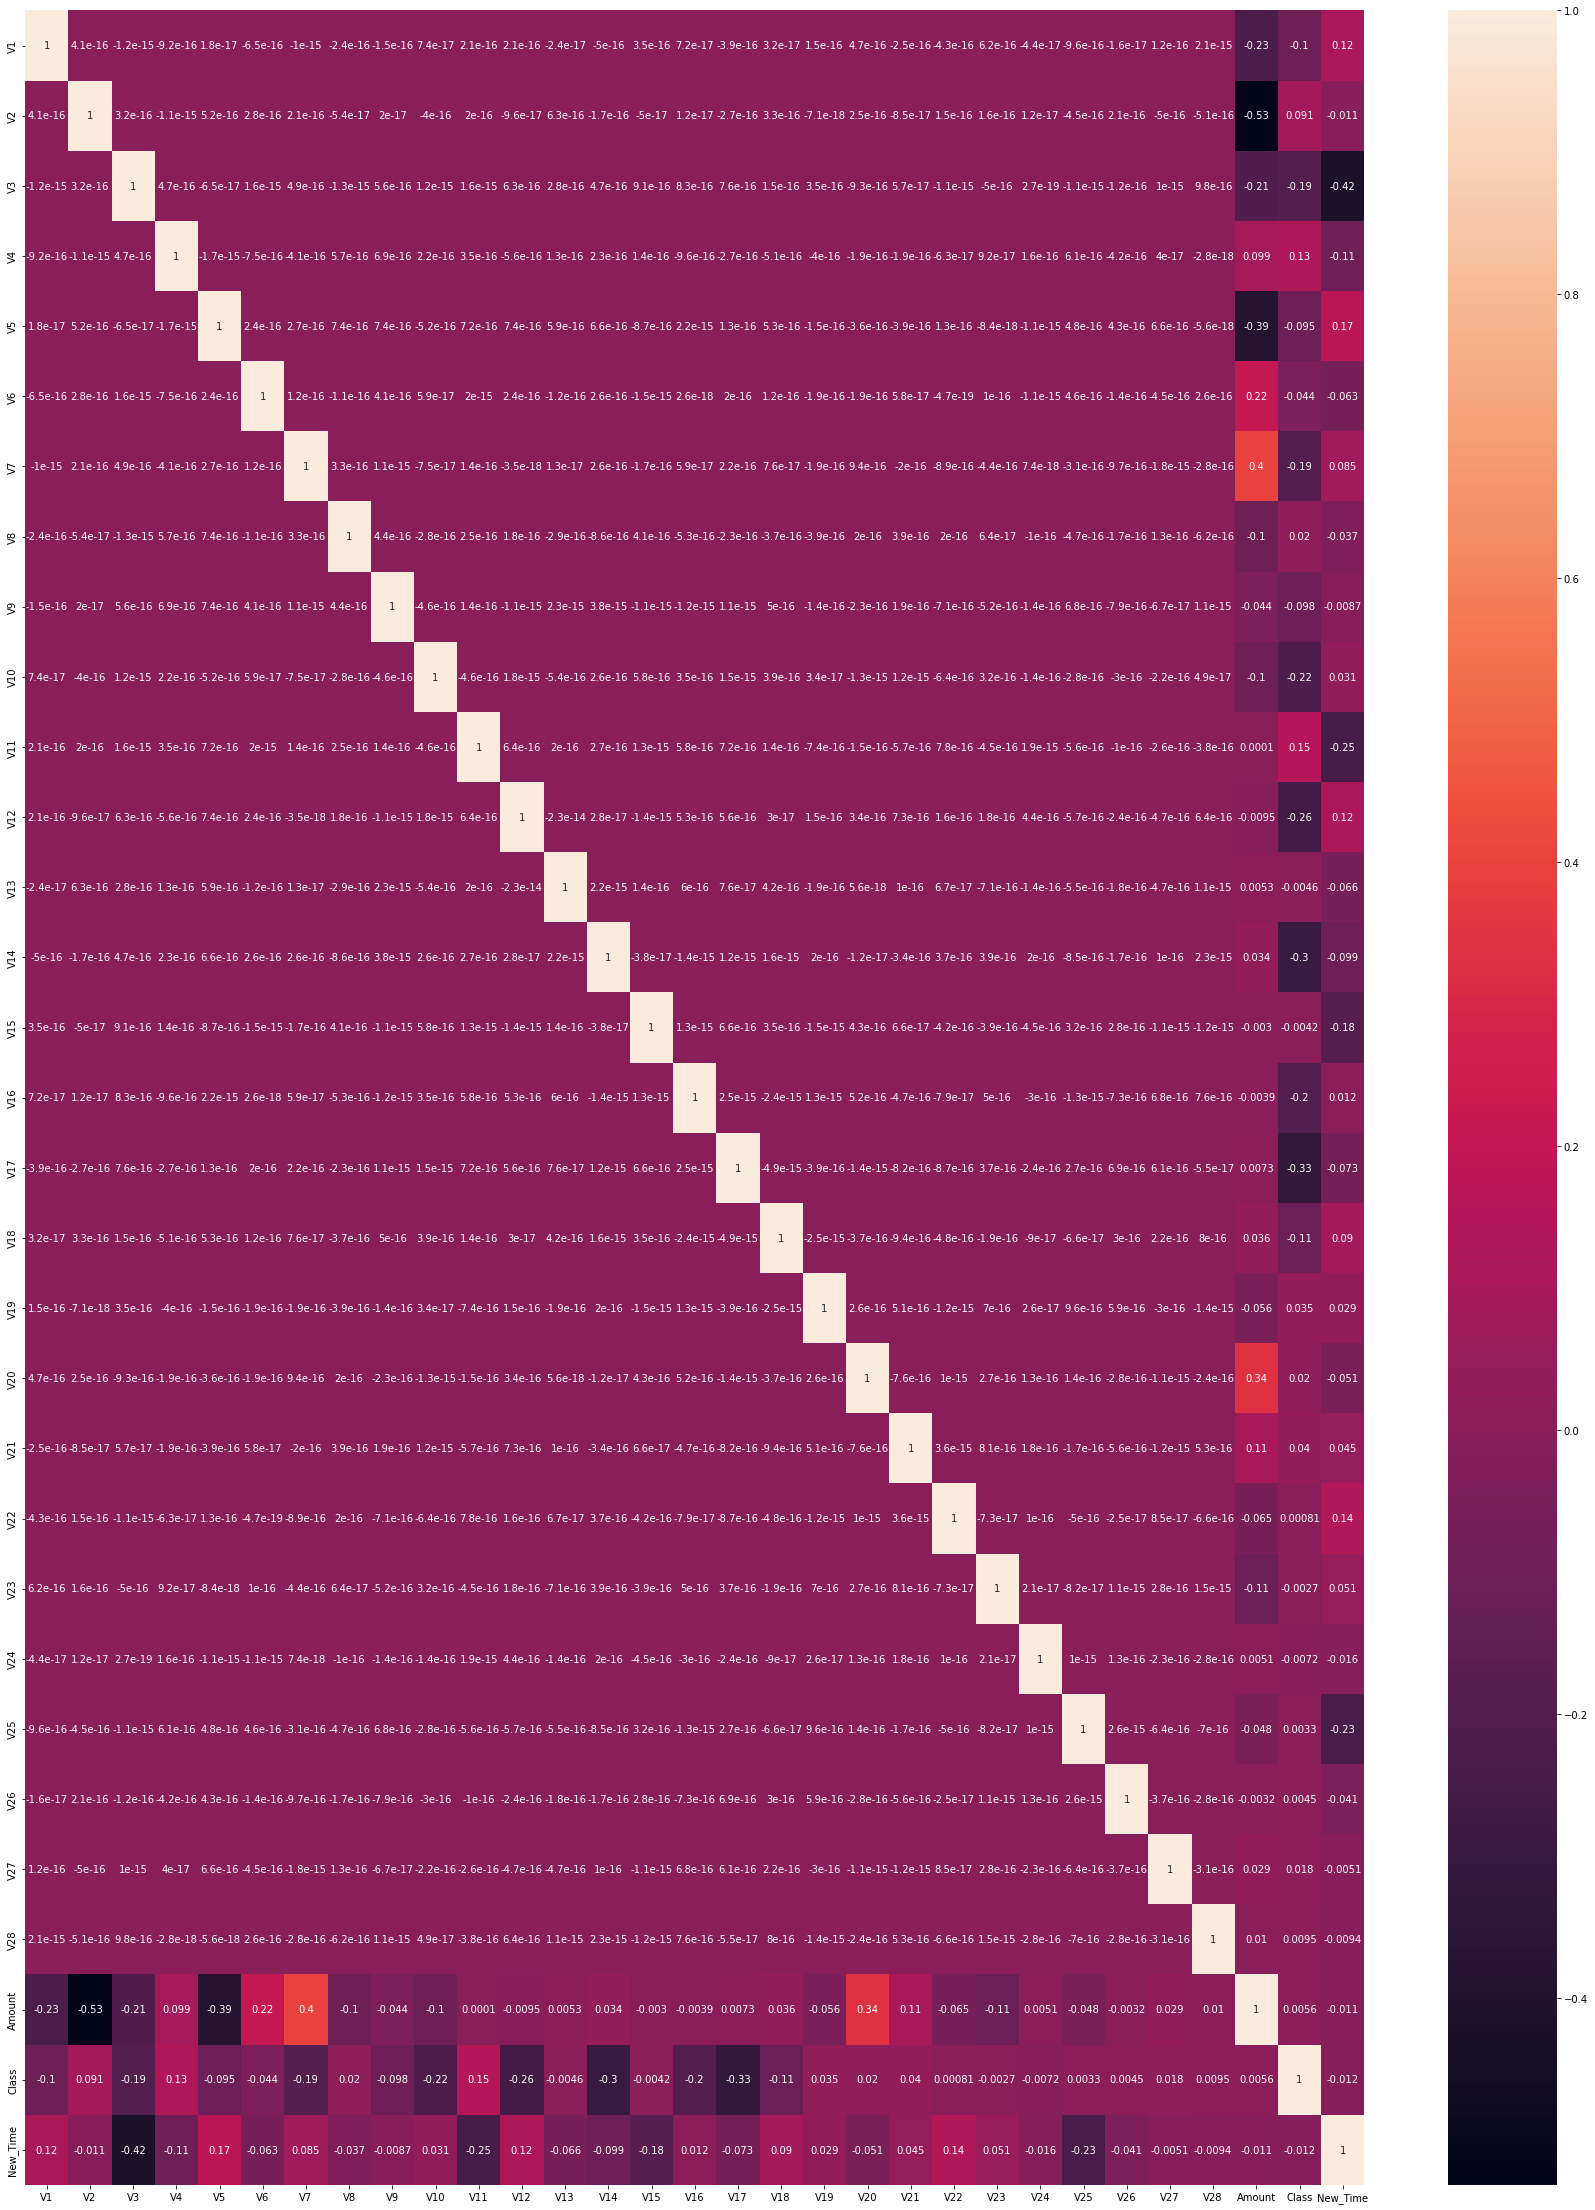

In [14]:
corr= train.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='Class', ylabel='count'>

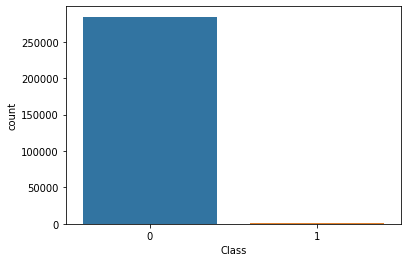

In [15]:
sns.countplot(train["Class"])

In [16]:
legit = train[train["Class"]==0]
fraud = train[train["Class"]==1]

Notes:
* Legit is indicated as 0.
* Fraud is indicated as 1.

In [17]:
legit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,New_Time
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0,284315.000000
mean,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0,0.548858
std,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,...,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0,0.274804
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,...,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0,0.000000
25%,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,...,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0,0.313846
50%,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,...,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0,0.490248
75%,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,...,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0,0.806363
max,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,...,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0,1.000000


In [18]:
fraud.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,New_Time
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0,492.000000
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0,0.467306
std,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,...,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0,0.276838
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0,0.002350
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0,0.238677
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0,0.437338
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0,0.743570
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0,0.985856


<a id= "3"></a>
# Model Building and Deployment

<a id= "4"></a>
## Spliting Data Into Features & Targets

In [19]:
X = train.drop(columns="Class",axis=1)
Y = train["Class"]

In [20]:
X


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,New_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.000006
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.000006
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.999965
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.999971
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.999977
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.999977


In [21]:
Y.unique()

array([0, 1])

<a id= "5"></a>
## Undersampling 

In [22]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(X, Y)

In [23]:
x_resampled.shape

(984, 30)

In [24]:
y_resampled.value_counts().unique()

array([492])

<AxesSubplot:xlabel='Class', ylabel='count'>

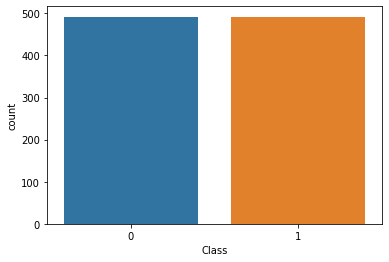

In [25]:
sns.countplot(y_resampled)

<a id= "6"></a>
## Train-Test-Split

In [26]:
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.33, random_state=42)

In [27]:
print(f"X Train:{X_train.shape}")
print(f"X Test:{X_test.shape}")
print(f"Y Test:{y_test.shape}")
print(f"Y Train:{y_train.shape}")

X Train:(659, 30)
X Test:(325, 30)
Y Test:(325,)
Y Train:(659,)


<a id= "7"></a>
## Methods

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [29]:
rs=42
models = {
    "LogisticRegression"   :LogisticRegression(random_state=rs),
    "KNeighborsClassifier" :KNeighborsClassifier(n_neighbors= 3,weights= "uniform" ,metric="euclidean"),
    "DecisionTreeClassifier":DecisionTreeClassifier(min_samples_split = 20,max_depth=20,random_state=rs),
    "SVC":SVC(kernel = "rbf",gamma= 0.01,C=1000,random_state=rs),
    "linearSVC":LinearSVC(),
    "MLPClassifier":MLPClassifier(),
    "RandomForestClassifier":RandomForestClassifier(max_features= 10,min_samples_split=10,min_samples_leaf=10,bootstrap=[False],criterion="gini",random_state=rs),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GaussianProcessClassifier":GaussianProcessClassifier(),
    "QuadraticDiscriminantAnalysis":QuadraticDiscriminantAnalysis(),
    "GaussianNB":  GaussianNB()
}

In [30]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print(name + " trained.")

LogisticRegression trained.
KNeighborsClassifier trained.
DecisionTreeClassifier trained.
SVC trained.
linearSVC trained.
MLPClassifier trained.
RandomForestClassifier trained.
AdaBoostClassifier trained.
GaussianProcessClassifier trained.
QuadraticDiscriminantAnalysis trained.
GaussianNB trained.


In [31]:
results =[]
    
for name,model in models.items():
    result = model.score(X_test,y_test)
    results.append(result)
    print(name+": {:.2f}%".format(result*100))

LogisticRegression: 93.54%
KNeighborsClassifier: 89.54%
DecisionTreeClassifier: 90.46%
SVC: 90.15%
linearSVC: 92.31%
MLPClassifier: 93.85%
RandomForestClassifier: 93.23%
AdaBoostClassifier: 93.23%
GaussianProcessClassifier: 89.23%
QuadraticDiscriminantAnalysis: 93.23%
GaussianNB: 92.00%


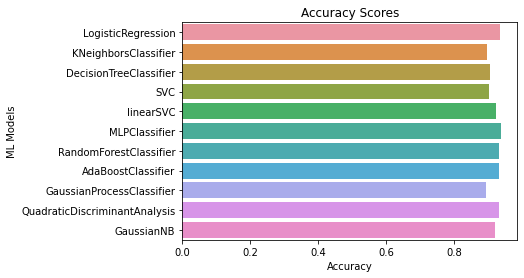

In [32]:
cv_results = pd.DataFrame({"Accuracy":results, "ML Models":[ "LogisticRegression","KNeighborsClassifier","DecisionTreeClassifier","SVC","linearSVC","MLPClassifier","RandomForestClassifier","AdaBoostClassifier","GaussianProcessClassifier",
    "QuadraticDiscriminantAnalysis",
    "GaussianNB"]})

g = sns.barplot("Accuracy", "ML Models", data = cv_results)
g.set_xlabel("Accuracy")
g.set_title("Accuracy Scores")
plt.show()

<a id= "8"></a>
## High Accuracy Ranking(First 6)
1. MLP Classifier
1. Linear SVC
1. Logistic Regression
1. Random Forest Classifier
1. Ada Boost Classifier
1. Quadratic Discriminant Analysis


In [33]:
y_predicted = []
Ml_Models = [ "LogisticRegression","KNeighborsClassifier","DecisionTreeClassifier","SVC","linearSVC","MLPClassifier","RandomForestClassifier","AdaBoostClassifier","GaussianProcessClassifier",
    "QuadraticDiscriminantAnalysis",
    "GaussianNB"]
for name,model in models.items():
    y_pred = model.predict(X_test)
    y_predicted.append(y_pred)

In [34]:
Ml_Models = [ "LogisticRegression","KNeighborsClassifier","DecisionTreeClassifier","SVC","linearSVC","MLPClassifier","RandomForestClassifier","AdaBoostClassifier","GaussianProcessClassifier",
    "QuadraticDiscriminantAnalysis",
    "GaussianNB"]
for i in range(len(list(models.values()))):
    print(Ml_Models[i])
    cm = confusion_matrix(y_test,y_predicted[i])
    print(cm)


LogisticRegression
[[158   6]
 [ 15 146]]
KNeighborsClassifier
[[155   9]
 [ 25 136]]
DecisionTreeClassifier
[[151  13]
 [ 18 143]]
SVC
[[145  19]
 [ 13 148]]
linearSVC
[[156   8]
 [ 17 144]]
MLPClassifier
[[157   7]
 [ 13 148]]
RandomForestClassifier
[[158   6]
 [ 16 145]]
AdaBoostClassifier
[[155   9]
 [ 13 148]]
GaussianProcessClassifier
[[155   9]
 [ 26 135]]
QuadraticDiscriminantAnalysis
[[157   7]
 [ 15 146]]
GaussianNB
[[160   4]
 [ 22 139]]


<a id= "9"></a>
## For Confusion Matrix 
### Highest TP and TN(First 6)
1. linearSVC
1. SVC
1. AdaBoostClassifier
1. LogisticRegression
1. MLPClassifier
1. QuadraticDiscriminantAnalysis

 


So Linear SVC is attracted attention with accuracy values.
Lest Visualization Linear SVC!!

In [35]:
print(Ml_Models[4])
LinearSVC_cm = confusion_matrix(y_test,y_predicted[4])
print(LinearSVC_cm)

linearSVC
[[156   8]
 [ 17 144]]


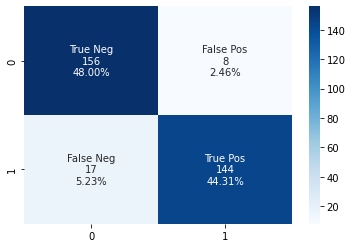

In [36]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                LinearSVC_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     LinearSVC_cm.flatten()/np.sum(LinearSVC_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(LinearSVC_cm, annot=labels, fmt="", cmap='Blues')
plt.show()

In [37]:
names = ["Legit","Fraud"]

for i in range(len(list(models.values()))):
    
    print("    "+Ml_Models[i]+"    ")
    print("////////////////////")
    CR = classification_report(y_test, y_predicted[i],target_names=names)
    print(CR)
    print("---------------------------------------")

    LogisticRegression    
////////////////////
              precision    recall  f1-score   support

       Legit       0.91      0.96      0.94       164
       Fraud       0.96      0.91      0.93       161

    accuracy                           0.94       325
   macro avg       0.94      0.94      0.94       325
weighted avg       0.94      0.94      0.94       325

---------------------------------------
    KNeighborsClassifier    
////////////////////
              precision    recall  f1-score   support

       Legit       0.86      0.95      0.90       164
       Fraud       0.94      0.84      0.89       161

    accuracy                           0.90       325
   macro avg       0.90      0.89      0.90       325
weighted avg       0.90      0.90      0.90       325

---------------------------------------
    DecisionTreeClassifier    
////////////////////
              precision    recall  f1-score   support

       Legit       0.89      0.92      0.91       164
       

<a id= "10"></a>
# Conclusion

Although other models have high f1 scores, I consider the use of Linear Svc method correct, taking into account other evaluations.